In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [15]:
df= pd.read_csv(r"C:\Users\aujal\OneDrive\Desktop\practicals\AI\AI TYCS\disease.csv")

In [16]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [17]:
df.shape

(349, 10)

In [21]:

le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])
df['Fever'] = le.fit_transform(df['Fever'])
df['Cough'] = le.fit_transform(df['Cough'])
df['Fatigue'] = le.fit_transform(df['Fatigue'])
df['Difficulty Breathing'] = le.fit_transform(df['Difficulty Breathing'])
df['Age'] = le.fit_transform(df['Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Blood Pressure'] = le.fit_transform(df['Blood Pressure'])
df['Cholesterol Level'] = le.fit_transform(df['Cholesterol Level'])
df['Outcome Variable'] = le.fit_transform(df['Outcome Variable'])

In [22]:
df.dtypes

Disease                 int64
Fever                   int64
Cough                   int64
Fatigue                 int64
Difficulty Breathing    int64
Age                     int64
Gender                  int64
Blood Pressure          int64
Cholesterol Level       int64
Outcome Variable        int64
dtype: object

In [23]:
x=df.drop('Outcome Variable', axis =1).values
y= df['Outcome Variable'].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn= KNeighborsClassifier(n_neighbors=k)
    #fit the model
    knn.fit(x_train, y_train)
    #Computer accuracy on the training set
    train_accuracy[i]= knn.score(x_train, y_train)
    #computer accuracy on the test set
    test_accuracy[i]= knn.score (x_test, y_test)

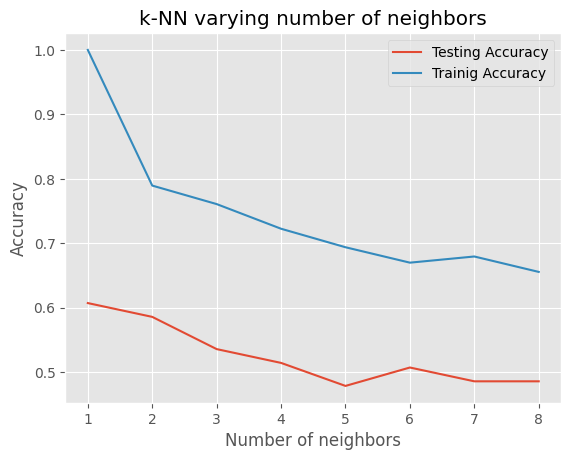

In [27]:
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Trainig Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel('Accuracy')
plt.show()

In [28]:
knn= KNeighborsClassifier(n_neighbors=7)

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
knn.score(x_test, y_test)

0.4857142857142857

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred= knn.predict(x_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[33, 32],
       [40, 35]])

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        65
           1       0.52      0.47      0.49        75

    accuracy                           0.49       140
   macro avg       0.49      0.49      0.49       140
weighted avg       0.49      0.49      0.49       140



In [36]:
y_pred_proba= knn.predict_proba(x_test)[:,1]

In [37]:
from sklearn.metrics import roc_curve

In [38]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_proba)

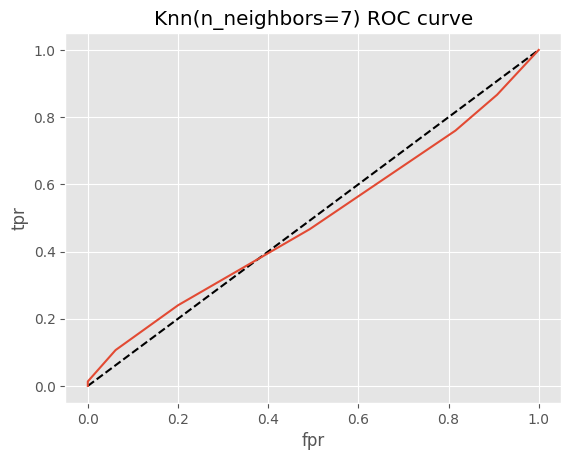

In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

np.float64(0.7536645726251665)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid= {'n_neighbors':np.arange(1,50)}

In [36]:
knn= KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, cv=5)
knn_cv.fit(x,y)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [37]:
knn_cv.best_score_

np.float64(0.7578558696205755)

In [38]:
knn_cv.best_params_

{'n_neighbors': np.int64(14)}